In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
list_D=[0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]

In [146]:
data_m_9nei={}
data_rho_9nei={}
mag_9nei={}

data_m_1nei={}
data_rho_1nei={}

for D in list(list_D):
    # m //
    data_m_9nei[D]=pd.read_csv('avg_prof_D/D%s/f_bands_m.dat'%np.round(9*D, decimals=1), sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(1200)])
    data_m_9nei[D]=(data_m_9nei[D].dropna(axis='rows')).values
    
    # rho //
    data_rho_9nei[D]=pd.read_csv('avg_prof_D/D%s/f_bands_rho.dat'%np.round(9*D, decimals=1), sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(1200)])
    data_rho_9nei[D]=(data_rho_9nei[D].dropna(axis='rows')).values
    
    # mag 9
    mag_9nei[D]=pd.read_csv('avg_prof_D/D%s/f_mag.dat'%np.round(9*D, decimals=1), sep=' ')
    
    # m --> 
    data_m_1nei[D]=pd.read_csv('../diag_rhol_D_pupdate/avg_prof_D_v2/D%s/f_bands_m.dat'%D, 
                          sep=' ', index_col=False, 
                          names=[str(a) for a in np.arange(400)])
    data_m_1nei[D]=(data_m_1nei[D].dropna(axis='rows')).values

    # rho --> 
    data_rho_1nei[D]=pd.read_csv('../diag_rhol_D_pupdate/avg_prof_D_v2/D%s/f_bands_rho.dat'%D, 
                          sep=' ', index_col=False, 
                          names=[str(a) for a in np.arange(400)])
    data_rho_1nei[D]=(data_rho_1nei[D].dropna(axis='rows')).values

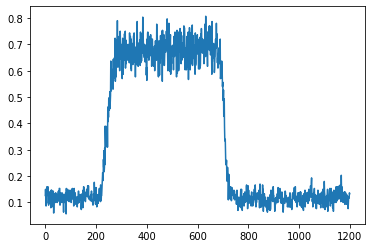

In [438]:
plt.plot(data_rho_9nei[0.2][-1])

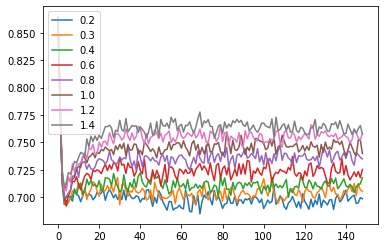

In [154]:
for D in list_D[1:]:
    plt.plot(mag_9nei[D].iloc[:,1], label=D)
plt.legend()

In [303]:
def align_prof(data, L=400, N=10):

    data=pd.DataFrame(data).rolling(window=N).mean().iloc[N-1:].values

    th=np.max(data[-1,:])/2

    t0, x0 = np.where((np.roll(data,5, axis=1)<=th)&(data<=th)&(np.roll(data,-1, axis=1)>=th))
    x1=x0[np.unique(t0, return_index=True)[1]]

    t0, x0 = np.where((data>=th)&(np.roll(data,-1, axis=1)<th)&(np.roll(data,-5, axis=1)<th))
    x2=x0[np.unique(t0, return_index=True)[1]]

    dx=[]
    for t in range(data.shape[0]):
        if x2[t]>x1[t]:
            dx.append(np.int64(0.5*(x2[t]+x1[t]-L)))
        else:
            dx.append(np.int64(0.5*(x2[t]+x1[t])))

    dx=np.array(dx)


    avg_prof=np.mean([np.roll(data[t, :], 
                             -dx[t]) 
                     for t in range(0, data.shape[0]) 
                     if x2[t]>x1[t]+50
                          ]
        , axis=0)
   
    
    return(avg_prof)

In [293]:
N=20
data_mean=pd.DataFrame(data).rolling(window=N).mean().iloc[N-1:].values

In [294]:
data_mean.shape

(60761, 1200)

In [298]:
data = data_m_9nei[1.4]
data=data_mean.copy()
th=np.max(data[-1,:])/2

t0, x0 = np.where((data<=th)&(np.roll(data,-1, axis=1)>=th))
x1=x0[np.unique(t0, return_index=True)[1]]

t0, x0 = np.where((data>=th)&(np.roll(data,-1, axis=1)<th))
x2=x0[np.unique(t0, return_index=True)[1]]

dx=[]
for t in range(data.shape[0]):
    if x2[t]>x1[t]:
        dx.append(np.int64(0.5*(x2[t]+x1[t]-1200)))
    else:
        dx.append(np.int64(0.5*(x2[t]+x1[t])))

dx=np.array(dx)

(0, 500)

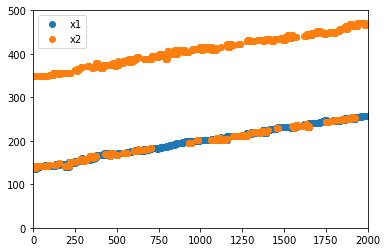

In [299]:
plt.plot(x2, 'o', label='x1')
plt.plot(x1, 'o', label='x2')
plt.legend()
plt.xlim(0,2000)
plt.ylim(0,500)

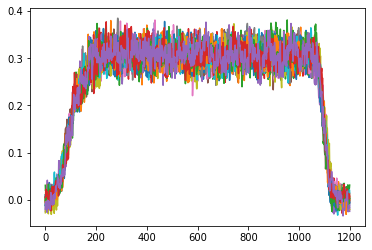

In [302]:
for t in range(0, data.shape[0], 100):
    if x2[t]>x1[t]+50:
        plt.plot(np.roll(data[t, :], -dx[t]))

                     

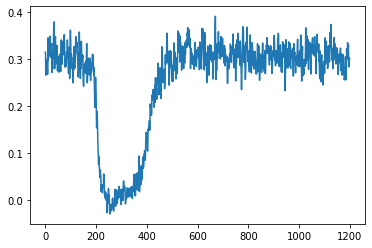

In [279]:
plt.plot(data_mean[1000,:].T);

In [304]:
avg_prof_m_9nei={}
avg_prof_rho_9nei={}

avg_prof_m_1nei={}
avg_prof_rho_1nei={}

for D in list_D[1:]:
    avg_prof_m_9nei[D]=align_prof(data_m_9nei[D], L=1200, N=20)
    avg_prof_rho_9nei[D]=align_prof(data_rho_9nei[D], L=1200, N=20)
    
    avg_prof_m_1nei[D]=align_prof(data_m_1nei[D], L=400, N=20)
    avg_prof_rho_1nei[D]=align_prof(data_rho_1nei[D], L=400, N=20)

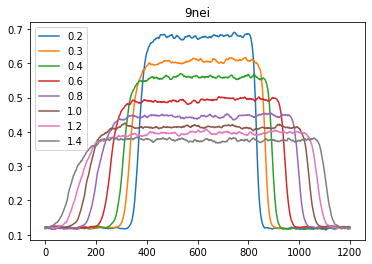

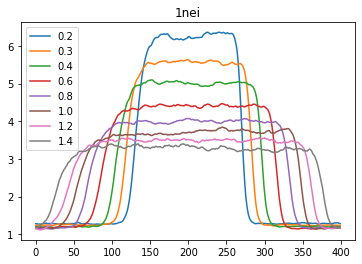

In [305]:
for D in list_D:
    try:
        plt.plot(avg_prof_rho_9nei[D], label=D)

        plt.legend()
    except: pass
    
plt.title('9nei')
    
plt.subplots()
for D in list_D:
    try:
        plt.plot(avg_prof_rho_1nei[D], label=D)

        plt.legend()
    except: pass

plt.title('1nei');

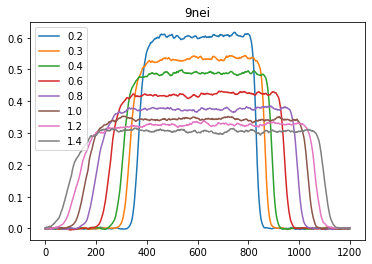

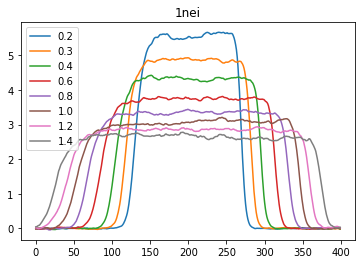

In [306]:
for D in list_D:
    try:
        plt.plot(avg_prof_m_9nei[D], label=D)

        plt.legend()
    except: pass
    
plt.title('9nei')
    
plt.subplots()
for D in list_D:
    try:
        plt.plot(avg_prof_m_1nei[D], label=D)

        plt.legend()
    except: pass

plt.title('1nei');

In [358]:
rhol0_9nei={}
rhog0_9nei={}

for D in list_D:
    try:
        rhol0_9nei[D]=np.mean(avg_prof_rho_9nei[D][570:630])
        rhog0_9nei[D]=np.mean(np.roll(avg_prof_rho_9nei[D], 600)[570:630])
    except: pass

In [359]:
rhol0_1nei={}
rhog0_1nei={}

for D in list_D[1:]:
    rhol0_1nei[D]=np.mean(avg_prof_rho_1nei[D][170:230])
    rhog0_1nei[D]=np.mean(np.roll(avg_prof_rho_1nei[D], 200)[180:220])
    

Text(0, 0.5, '$D$')

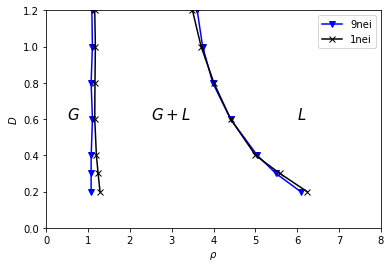

In [360]:
u=list(rhol0_9nei)
plt.plot([9*rhol0_9nei[D] for D in u], u, 'bv-', label='9nei')
plt.plot([9*rhog0_9nei[D] for D in u], u, 'bv-')

plt.plot([rhol0_1nei[D] for D in u], u, 'kx-', label='1nei')
plt.plot([rhog0_1nei[D] for D in u], u, 'kx-')

plt.xlim(0,8)
plt.ylim(0,1.2)

plt.annotate(r'$G$', xy=(0.5,0.6), fontsize=15)
plt.annotate(r'$G+L$', xy=(2.5,0.6), fontsize=15)
plt.annotate(r'$L$', xy=(6,0.6), fontsize=15)


plt.legend()

plt.xlabel(r'$\rho$')
plt.ylabel(r'$D$')

#plt.savefig('rho0_D_on_latt.pdf')

NameError: name 'r' is not defined

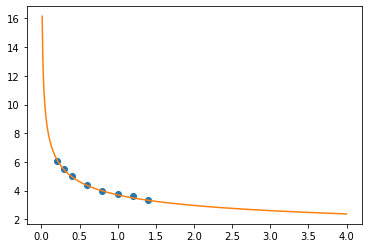

In [441]:
absu=np.linspace(0.01, 4, 1000)
plt.plot(u, [9*rhol0_9nei[D] for D in u], 'o')
plt.plot(absu, 3.7*absu**(-0.32))
#plt.xlim(0,0.1)

In [444]:
rhol_tofit=[9*rhol0_9nei[D] for D in u]

In [446]:
rhol_tofit=[7.23, 7]+rhol_tofit

In [447]:
rhol_tofit

[7.23,
 7,
 6.077379099362607,
 5.4890496159303375,
 5.041453203143987,
 4.404952042203146,
 3.9803216718597105,
 3.7379714248705844,
 3.608099157013447,
 3.36050580108745]

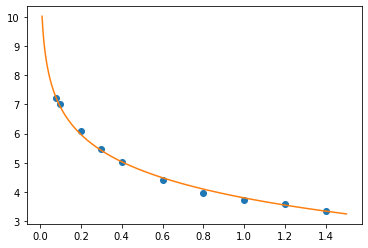

In [481]:
absu=np.linspace(0.01, 1.5, 1000)
plt.plot([0.08, 0.1]+u, rhol_tofit, 'o')
plt.plot(absu, -1.35*np.log(absu)+3.8)
# plt.xlim(0.07,1)
# plt.ylim(3, 8)

In [483]:
D=0.06
-1.35*np.log(D)+3.8


7.598104467626049

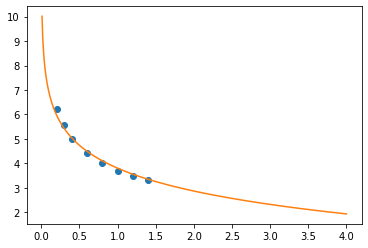

In [485]:
absu=np.linspace(0.01, 4, 1000)
plt.plot(u, [rhol0_1nei[D] for D in rhol0_1nei], 'o')
plt.plot(absu, -1.35*np.log(absu)+3.8)
#plt.xlim(0,0.1)

## Stable profiles 

In [347]:
df_9nei=pd.DataFrame(columns=['D', 'phi', 'rhol'])

In [434]:
9*0.675264

6.077376

In [410]:
df_9nei

,D,phi,rhol
0,0.2,469,0.675264
1,0.3,539,0.609894
2,0.4,595,0.560161
3,0.6,701,0.489439
4,0.8,809,0.442258
5,1.0,893,0.415330
6,1.2,964,0.400900
7,1.4,1035,0.373390


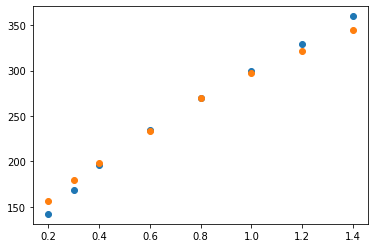

In [431]:
plt.plot(df_1nei.D, df_1nei.phi, 'o')
plt.plot(df_1nei.D, df_9nei.phi/3, 'o')

In [349]:
df_9nei.D=list_D[1:]

In [353]:
list_phi=[]
for D in list_D[1:]:
    data=avg_prof_rho_9nei[D]
    th=np.max(data)/2
    x1 = np.where((data<=th)&(np.roll(data,-1)>=th))[0][0]
    x2 = np.where((data>=th)&(np.roll(data,-1)<th))[0][0]
    list_phi.append(x2-x1)

In [366]:
df_9nei.phi=list_phi
df_9nei.rhol=[rhol0_9nei[D] for D in rhol0_9nei]

___

In [370]:
df_1nei=pd.DataFrame(columns=['D', 'phi', 'rhol'])

In [375]:
df_1nei

,D,phi,rhol
0,0.2,142,6.233078
1,0.3,168,5.583147
2,0.4,196,5.000868
3,0.6,235,4.408203
4,0.8,270,4.006702
5,1.0,300,3.701361
6,1.2,329,3.494967
7,1.4,360,3.323673


In [372]:
df_1nei.D=list_D[1:]

In [373]:
list_phi=[]
for D in list_D[1:]:
    data=avg_prof_rho_1nei[D]
    th=np.max(data)/2
    x1 = np.where((data<=th)&(np.roll(data,-1)>=th))[0][0]
    x2 = np.where((data>=th)&(np.roll(data,-1)<th))[0][0]
    list_phi.append(x2-x1)

In [374]:
df_1nei.phi=list_phi
df_1nei.rhol=[rhol0_1nei[D] for D in rhol0_1nei]

## garbage

In [20]:
from scipy.optimize import fixed_point

In [21]:
alpha=fixed_point(lambda x : np.tanh(2*x), x0=0.5)

In [22]:
1/alpha

1.0443820337608334

In [27]:
u=np.array(u)

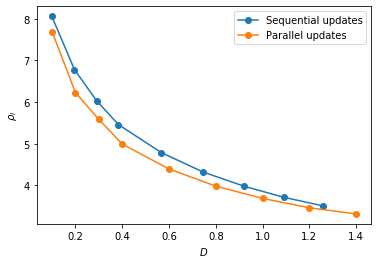

In [28]:
plt.plot(u*(1-u/(4*u+1+np.exp(2))), [rhol0_s[D] for D in u], 'o-', label='Sequential updates')
plt.plot(u, [rhol0_p[D]for D in u], 'o-', label='Parallel updates')
plt.legend()
plt.xlabel(r'$D$');
plt.ylabel(r'$\rho_l$');

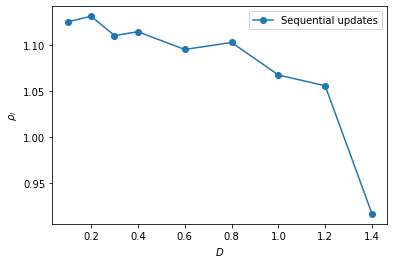

In [89]:
plt.plot(u, [rhog0_s[D]/rhog0_p[D] for D in u], 'o-', label='Sequential updates')
#plt.plot(list_D, [ for D in list_D], 'o-', label='Parallel updates')
plt.legend()
plt.xlabel(r'$D$');
plt.ylabel(r'$\rho_l$');

# $\langle m \rangle$

In [85]:
mag_seq={}
mag_par={}
for D in list_D:
    print(D)
    mag_seq[D]=pd.read_csv('../diag_rhol_D_supdate/avg_prof_D_v2/D%s/f_mag.dat'%D, sep=' ', names=['t', 'm']).m.values[-50:].mean()
    try:
        mag_par[D]=pd.read_csv('avg_prof_D_v2/D%s/f_mag.dat'%D, sep=' ', names=['t', 'm']).m.values[-50:].mean()
    except:pass

0.1
0.2
0.3
0.4
0.6
0.8
1.0
1.2
1.4


In [86]:
mag_par

{0.1: 0.60469098,
 0.2: 0.6397413399999999,
 0.3: 0.6583876399999999,
 0.4: 0.67888496,
 0.6: 0.70418634,
 0.8: 0.7255469600000001,
 1.0: 0.7396983,
 1.2: 0.7524533400000002,
 1.4: 0.7632057600000001}

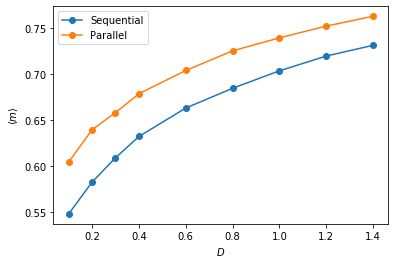

In [87]:
plt.plot(list_D, [mag_seq[D] for D in list_D], 'o-', label='Sequential')
plt.plot(list_D, [mag_par[D] for D in list_D], 'o-', label='Parallel')

plt.xlabel(r'$D$')
plt.ylabel(r'$\langle m \rangle$')

plt.legend()